# Project Data Mining
# Thème : Classification et clustering des tweets en Python
# Réalisé par : Nabil Lefi 3DNI1

## Objectifs :

* Maitriser l’API de twitter pour l’extraction des tweets
* Maitriser la partie NLP (natural language processing) avec NLTK en Python
* Appliquer les principes de nettoyage des données
* Classer les tweets : regrouper ensemble les tweets qui sont similaires. C’est une étape qui peut être considérée comme une étape
## Twitter
Twitter est un service de réseautage social et de micro-blogging sur lequel les utilisateurs publient et interagissent les uns avec les autres via des messages appelés «tweets». Il est classé au 6e rang des sites et applications de réseautage social les plus populaires par Dream Grow en avril 2020 avec une moyenne de 330 millions d'utilisateurs actifs par mois.

## Spécifications
Imaginons que vous avez un compte Twitter, et que vous lez suivre les tweets (texte très court) sur ce réseau social. Vu le nombre colossal de Tweets, et faute de temps, vous n’avez pas la possibilité de les lire tous. Pour cela, vous avez besoin d’une application qui va jouer le rôle d’assistantet qui va vous effectuer un résumé de toutes ces informations. Une des approches qu’on peut utiliser estde le classer sous former de groupes de sorte à ce qu’on présente à l’utilisateur un seul Tweet de chaque groupe. Pour cela, on doit procéder en trois grandes étapes :

1- Prétraitement des tweets
Dans cette étape, l’objectif est d’éliminer le texte inutile des tweets tels que les #, les noms des utilisateurs, les url, …

2- Traitement des tweets : NLP (Natural LanguageProcessing) On doit procéder à l’analyse du tweet en respectant les différentes étapes du NLP (Natural LanguageProcessing). La bibliothèque à utiliser est NLTK en Python.

3- Classification des tweets Etant donné un ensemble de tweets, l’objectif est de les résumer sous formes de groupes de sorte à ce que les Tweets qui sont dans le même groupe soient similaires. Ainsi, l’utilisateur pourra par la suite lire juste un Tweet de chaque groupe (le Tweet qui est le centroïde de groupes).

## Travail à Faire
* On a Telecharger les tweets a partir de Twitter en utilisant l'API de twitter. Pour cela, vous devriez un compte « Twitter Developper ». Pour cela, vous devriez telecharger au moins 10 mille twwets.
* On Utiliser la bibliothèque NLTK pour effectuer une analyse de chaque tweet et le transformer en un ensemble de mots en suivant les différentes étapes de base du processus NLP (Natural LanguageProcessing). Pour la documentation sur NLTK et les différentes phases du NLP. Utiliser l’algorithme K-Means pour classer les Tweets en k classes (vous pouvez essayer plusieurs valeurs de k allant de 3 à 30 par exemple).
* Après avoir récupéré les classes, choisissez un Tweet par classe comme représentant. Les Tweets choisis seront les résumés de toutes les informations contenues dans les Tweets.

## Réalisation:

importez les bibliothèques tweepy et pandas:

In [1]:
#import the tweepy and pandas libraries:
import tweepy
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import re
import string
import nltk 
import io 
import seaborn as sns
import collections
 

Clés client et jetons d'accès, utilisés pour OAuth

In [2]:
# Consumer keys and access tokens, used for OAuth
consumer_key = 'gTOtUcUgaKid77h4wajeMAYMy'
consumer_secret = 'lPUcq66PIVChBs8NPEmai4T2dj2fUoHtvTEOsNEWGHMnosYGsu'
access_token = '1127537413553836039-oJYi1ETGHeEsiMyHsVCA78FUglToJ1'
access_token_secret = 'Javf8TtcaJL79VapHOPqxyErBtl8tTrDUhmuxfWSbiEcC'

In [3]:
# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

Création de l'interface proprement dite, en utilisant l'authentification

In [4]:
# Creation of the actual interface, using authentication
api = tweepy.API(auth, wait_on_rate_limit= True)

On va télécharger les Tweets à partir de Twitter en utilisant l’API de twitter. Pour cela, on doit obetenir un compte « Twitter Developer ».

In [ ]:
posts = tweepy.Cursor(api.search,q="FootBall", lang = "en",count=10000).items(12000)
data_analysis = pd.DataFrame(columns = ['Tweets'])
i=0
for tweet in posts:
      data_analysis.loc[i,"Tweets"] = tweet.text
      i+=1

In [ ]:
data_analysis.shape

Maintenant on va sauvgarder les tweets dansun fichier csv

In [7]:
data_analysis.to_csv('data_analysis.csv',index = False)
data_analysis.head(20)

,Tweets
0,See her among FOOTBALL players ? a FRIGGING QU...
1,RT @TheBadgerNation: #Badgers Notes: A big Wis...
2,@PapiReed_ Football factory
3,RT @ChrisEvansQB: Blessed and proud to say I w...
4,We are even more excited that Coach Hegamin @g...
5,RT @YannickBolasie: If you actually watch foot...
6,@aldotcom I will never understand why people v...
7,RT @BenStewart2003: After a great conversation...
8,@DannyDeraney Board game would be Life. Physic...
9,First ever program trivia night begins in 1 hr...


In [8]:
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  12000 non-null  object
dtypes: object(1)
memory usage: 507.5+ KB


Les tweets contiennent des objets inutiles tels que des hashtags, des mentions, des liens et des signes de ponctuation qui peuvent affecter les performances d'un algorithme et doivent donc être supprimés. Tous les textes sont convertis en minuscules pour éviter que les algorithmes n'interprètent les mêmes mots avec des cas différents comme différents.

In [9]:
#Clean the text
#Create a function to clean the tweets
def cleanText(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','', text) #Removed @mentions
    text = re.sub(r'RT[\s]+','', text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','', text) #Removing the hyper link

    return text

#cleaning the text
data_analysis['clean Tweets']=data_analysis['Tweets'].apply(cleanText)
data_analysis.head(20)

,Tweets,clean Tweets
0,See her among FOOTBALL players ? a FRIGGING QU...,See her among FOOTBALL players ? a FRIGGING QU...
1,RT @TheBadgerNation: #Badgers Notes: A big Wis...,: #Badgers Notes: A big Wisconsin notes packag...
2,@PapiReed_ Football factory,_ Football factory
3,RT @ChrisEvansQB: Blessed and proud to say I w...,: Blessed and proud to say I will be playing f...
4,We are even more excited that Coach Hegamin @g...,We are even more excited that Coach Hegamin w...
5,RT @YannickBolasie: If you actually watch foot...,: If you actually watch football you’ll know P...
6,@aldotcom I will never understand why people v...,I will never understand why people voted for ...
7,RT @BenStewart2003: After a great conversation...,: After a great conversation with and _monaco...
8,@DannyDeraney Board game would be Life. Physic...,Board game would be Life. Physical would be H...
9,First ever program trivia night begins in 1 hr...,First ever program trivia night begins in 1 hr...


In [10]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]")
data_analysis['clean emoji']=data_analysis['clean Tweets'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
data_analysis.head(20)

,Tweets,clean Tweets,clean emoji
0,See her among FOOTBALL players ? a FRIGGING QU...,See her among FOOTBALL players ? a FRIGGING QU...,See her among FOOTBALL players ? a FRIGGING QU...
1,RT @TheBadgerNation: #Badgers Notes: A big Wis...,: #Badgers Notes: A big Wisconsin notes packag...,: #Badgers Notes: A big Wisconsin notes packag...
2,@PapiReed_ Football factory,_ Football factory,_ Football factory
3,RT @ChrisEvansQB: Blessed and proud to say I w...,: Blessed and proud to say I will be playing f...,: Blessed and proud to say I will be playing f...
4,We are even more excited that Coach Hegamin @g...,We are even more excited that Coach Hegamin w...,We are even more excited that Coach Hegamin w...
5,RT @YannickBolasie: If you actually watch foot...,: If you actually watch football you’ll know P...,: If you actually watch football youll know Po...
6,@aldotcom I will never understand why people v...,I will never understand why people voted for ...,I will never understand why people voted for ...
7,RT @BenStewart2003: After a great conversation...,: After a great conversation with and _monaco...,: After a great conversation with and _monaco...
8,@DannyDeraney Board game would be Life. Physic...,Board game would be Life. Physical would be H...,Board game would be Life. Physical would be H...
9,First ever program trivia night begins in 1 hr...,First ever program trivia night begins in 1 hr...,First ever program trivia night begins in 1 hr...


In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
data_analysis['Tweet_punct'] = data_analysis['clean emoji'].apply(lambda x: remove_punct(x))
data_analysis.head(20)

,Tweets,clean Tweets,clean emoji,Tweet_punct
0,See her among FOOTBALL players ? a FRIGGING QU...,See her among FOOTBALL players ? a FRIGGING QU...,See her among FOOTBALL players ? a FRIGGING QU...,See her among FOOTBALL players a FRIGGING QUE...
1,RT @TheBadgerNation: #Badgers Notes: A big Wis...,: #Badgers Notes: A big Wisconsin notes packag...,: #Badgers Notes: A big Wisconsin notes packag...,Badgers Notes A big Wisconsin notes package t...
2,@PapiReed_ Football factory,_ Football factory,_ Football factory,Football factory
3,RT @ChrisEvansQB: Blessed and proud to say I w...,: Blessed and proud to say I will be playing f...,: Blessed and proud to say I will be playing f...,Blessed and proud to say I will be playing fo...
4,We are even more excited that Coach Hegamin @g...,We are even more excited that Coach Hegamin w...,We are even more excited that Coach Hegamin w...,We are even more excited that Coach Hegamin w...
5,RT @YannickBolasie: If you actually watch foot...,: If you actually watch football you’ll know P...,: If you actually watch football youll know Po...,If you actually watch football youll know Pog...
6,@aldotcom I will never understand why people v...,I will never understand why people voted for ...,I will never understand why people voted for ...,I will never understand why people voted for ...
7,RT @BenStewart2003: After a great conversation...,: After a great conversation with and _monaco...,: After a great conversation with and _monaco...,After a great conversation with and monaco I...
8,@DannyDeraney Board game would be Life. Physic...,Board game would be Life. Physical would be H...,Board game would be Life. Physical would be H...,Board game would be Life Physical would be Hi...
9,First ever program trivia night begins in 1 hr...,First ever program trivia night begins in 1 hr...,First ever program trivia night begins in 1 hr...,First ever program trivia night begins in hr ...


Tokenisation, lemmatisation et suppression des mots vides

In [13]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

data_analysis['Tweet_tokenized'] = data_analysis['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
data_analysis.head(20)

,Tweets,clean Tweets,clean emoji,Tweet_punct,Tweet_tokenized
0,See her among FOOTBALL players ? a FRIGGING QU...,See her among FOOTBALL players ? a FRIGGING QU...,See her among FOOTBALL players ? a FRIGGING QU...,See her among FOOTBALL players a FRIGGING QUE...,"[see, her, among, football, players, a, friggi..."
1,RT @TheBadgerNation: #Badgers Notes: A big Wis...,: #Badgers Notes: A big Wisconsin notes packag...,: #Badgers Notes: A big Wisconsin notes packag...,Badgers Notes A big Wisconsin notes package t...,"[, badgers, notes, a, big, wisconsin, notes, p..."
2,@PapiReed_ Football factory,_ Football factory,_ Football factory,Football factory,"[, football, factory]"
3,RT @ChrisEvansQB: Blessed and proud to say I w...,: Blessed and proud to say I will be playing f...,: Blessed and proud to say I will be playing f...,Blessed and proud to say I will be playing fo...,"[, blessed, and, proud, to, say, i, will, be, ..."
4,We are even more excited that Coach Hegamin @g...,We are even more excited that Coach Hegamin w...,We are even more excited that Coach Hegamin w...,We are even more excited that Coach Hegamin w...,"[we, are, even, more, excited, that, coach, he..."
5,RT @YannickBolasie: If you actually watch foot...,: If you actually watch football you’ll know P...,: If you actually watch football youll know Po...,If you actually watch football youll know Pog...,"[, if, you, actually, watch, football, youll, ..."
6,@aldotcom I will never understand why people v...,I will never understand why people voted for ...,I will never understand why people voted for ...,I will never understand why people voted for ...,"[, i, will, never, understand, why, people, vo..."
7,RT @BenStewart2003: After a great conversation...,: After a great conversation with and _monaco...,: After a great conversation with and _monaco...,After a great conversation with and monaco I...,"[, after, a, great, conversation, with, and, m..."
8,@DannyDeraney Board game would be Life. Physic...,Board game would be Life. Physical would be H...,Board game would be Life. Physical would be H...,Board game would be Life Physical would be Hi...,"[, board, game, would, be, life, physical, wou..."
9,First ever program trivia night begins in 1 hr...,First ever program trivia night begins in 1 hr...,First ever program trivia night begins in 1 hr...,First ever program trivia night begins in hr ...,"[first, ever, program, trivia, night, begins, ..."


In [14]:
data_analysis['Tweet_tokenized'].to_csv('cleaning_data_analysis.csv',index = False)

In [15]:
#data_analysis.head(20)

## NLP

In [16]:
nltk.download('stopwords' )

[nltk_data] Downloading package stopwords to /home/nabil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stopword = nltk.corpus.stopwords.words('english')

In [18]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
  
# word_tokenize accepts 
# a string as an input, not a file.  
stop_words = set(stopwords.words('english'))  
file1 = open("cleaning_data_analysis.csv")  
  
# Use this to read file content as a stream:  
line = file1.read() 
words = line.split()  
for r in words:  
    if not r in stop_words:  
        appendFile = open('cleaning_data_analysis.csv','a')  
        appendFile.write(" "+r)  
        appendFile.close() 
print(stop_words)

{'itself', 'just', 'both', 'on', 'doesn', "shan't", 'yourself', 'you', 'our', 'those', 'here', 'few', 'o', 'ma', 'yours', 'm', 'other', 'haven', 'between', 'once', 'during', 'hadn', 'while', 'because', 'when', 'wasn', 'theirs', 'but', 'against', 's', "haven't", "you've", "she's", 'no', 'we', 'been', 'these', 'he', 'was', 'such', 'll', 'through', 'and', 'out', 'what', 'your', 'are', 're', 'only', "couldn't", 'there', 'whom', 'very', 'which', 'should', 'each', 'didn', 'into', 'shan', 'will', 'his', 'with', 'from', 'above', 'this', 'has', 'have', 'it', 'not', 'an', 'having', "you're", 'were', 'down', 'off', 'than', "didn't", "hasn't", 'mustn', 'is', 'most', 'did', "aren't", "doesn't", 'being', 'all', 'a', 'where', 'about', 'who', 'can', 'them', 'of', 'do', "mustn't", 'to', "you'll", 'him', 'more', 'as', "wouldn't", "hadn't", 'themselves', 'how', "you'd", 'ours', 'their', 'won', 'wouldn', 'weren', "won't", 'herself', "it's", 'myself', 'be', 'at', 'its', 'isn', "mightn't", 'before', 'hasn',

In [19]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer() 
stemed_dataset=[]
for i in range(0,data_analysis.shape[0]):
    stemmed_array=data_analysis['Tweet_punct'][i].split()
    stemmed=[ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed=' '.join(stemmed)
    stemed_dataset.append(stemmed)
print(stemed_dataset[0:10])

['see among footbal player frig queen she streamshow', 'badger note A big wisconsin note packag talk know senior return devin chandl', 'footbal factori', 'bless proud say I play footbal continu educ tcnj realli excit next ye', 'We even excit coach hegamin serv new leadership role director footba', 'If actual watch footbal youll know pogba slap ball regularwhen talk vision amp techni', 'I never understand peopl vote rich footbal coach', 'after great convers monaco Im thank receiv offer east texa baptist', 'board game would life physic would hide seek even long day work come', 'first ever program trivia night begin hr DM coach need zoom info will find know west']


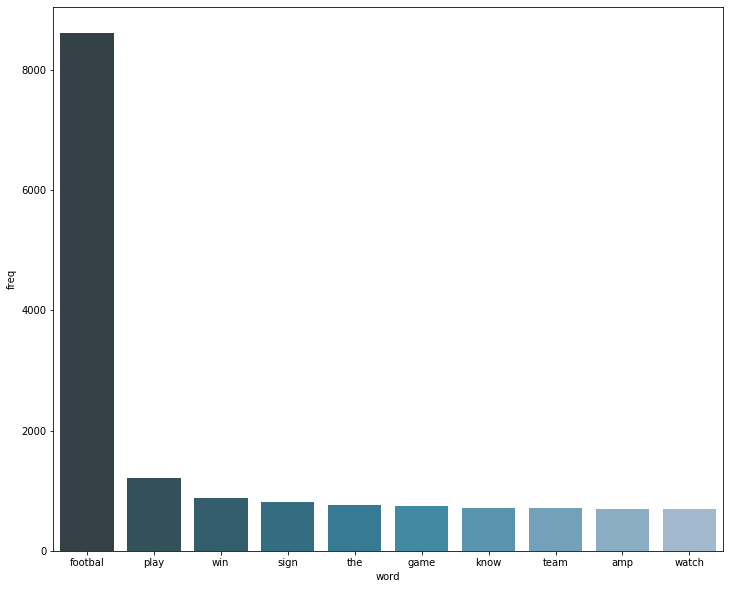

In [20]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow = cv.fit_transform(stemed_dataset)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [21]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud 
plt.style.use('fivethirtyeight')
# Plot the word cloud
allWords = ' '.join([twts for twts in data_analysis['Tweet_punct']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size=119).generate(allWords)
#wordCloud=WordCloud(background_color='black',mode="RGB", width=2000 , height=1000).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
X=cv.fit_transform(stemed_dataset)
print(X)

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

In [ ]:
for i in range(1,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

In [ ]:
plt.plot(range(1,30),wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)

In [ ]:
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")